## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [2]:
df_default = pd.read_csv('../data/signdata-11-5-20.csv')
df_default.shape

(2723, 191)

In [3]:
handshapeImages = pd.read_csv('../data/HandshapeImages.csv')
for index,imageURL in enumerate(handshapeImages['HandshapeImage']):
    newURL = imageURL[:5] + "width=\"100\" height=\"100\" " + imageURL[5:]
    handshapeImages.loc[index,'HandshapeImage'] = newURL
handshapeImages.shape

(2723, 5)

In [5]:
handImages = handshapeImages['HandshapeImage']

In [6]:
df_default = df_default.join(handImages)

In [7]:
df_default

,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,SignBankEnglishTranslations,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,HandshapeImage - 100x100,HandshapeImage: URL,Parameter.Neighborhood.Density.2.0.1,SignBankSemanticField,HandshapeImage
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,"bill, cash, dollar, money",1_DOLLAR,1268.0,NaN,NaN,NaN,NaN,383,None,"<img width=""100"" height=""100"" src=""https://asl..."
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,"dollar, five dollars, money",5_DOLLAR,2436.0,NaN,NaN,NaN,NaN,190,Number,"<img width=""100"" height=""100"" src=""https://asl..."
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,"eight hours, 8 hours, hour, time",NUMBER-HOURS,2437.0,NaN,NaN,NaN,NaN,129,Number,"<img width=""100"" height=""100"" src=""https://asl..."
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,2857.0,NaN,NaN,NaN,NaN,48,None,"<img width=""100"" height=""100"" src=""https://asl..."
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,"<img width=""100"" height=""100"" src=""https://asl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,zero,zero,D_03_036,D,3.0,36.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345983725,3.039,...,"0, none, number, zero, zilch",ZERO,1478.0,NaN,NaN,NaN,NaN,482,Number,"<img width=""100"" height=""100"" src=""https://asl..."
2719,zipper,zipper,D_01_034,D,1.0,34.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345804301,2.161,...,"coat, jacket, zipper",ZIPPER,94.0,29.0,28.0,NaN,NaN,165,None,"<img width=""100"" height=""100"" src=""https://asl..."
2720,zoo,zoo,E_03_042,E,3.0,42.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346067693,2.843,...,NaN,NaN,NaN,39.0,28.0,NaN,NaN,137,NaN,"<img width=""100"" height=""100"" src=""https://asl..."
2721,zoom_in,zoom_in,B_02_056,B,2.0,56.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555455,NaN,...,"computer screen, enlarge, expand, make bigger,...",ZOOM-IN,3114.0,NaN,NaN,NaN,NaN,524,Event,"<img width=""100"" height=""100"" src=""https://asl..."


In [8]:
df_subset = df_default[['EntryID', 'LemmaID','Code','YouTube Video', 'VimeoVideo', 'Phonological Complexity']]
df_subset

,EntryID,LemmaID,Code,YouTube Video,VimeoVideo,Phonological Complexity
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345587917,2.0
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344399314,1.0
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345588916,4.0
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345589804,1.0
4,a-line_bob,a-line_bob,K_03_127,NaN,https://player.vimeo.com/video/342308099,2.0
...,...,...,...,...,...,...
2718,zero,zero,D_03_036,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345983725,1.0
2719,zipper,zipper,D_01_034,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345804301,1.0
2720,zoo,zoo,E_03_042,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/346067693,3.0
2721,zoom_in,zoom_in,B_02_056,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345555455,1.0


In [9]:
df_subset.to_csv('signdata_with_urls.csv')

In [10]:
df_default["Code"].values

array(['C_02_025', 'B_01_062', 'C_02_055', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [11]:
edges_df = pd.read_csv('../data/generated-data/default-neighbors.csv') 
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [12]:
edges_df.shape

(13556, 6)

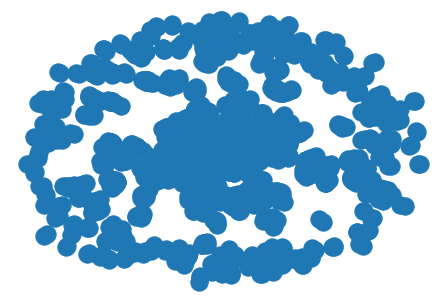

In [13]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [14]:
#first compute the best partition
# from community import greedy_modularity_communities
import community

G = g

#Two methods for community analysis
# c = greedy_modularity_communities(G)
partition = community.best_partition(G)

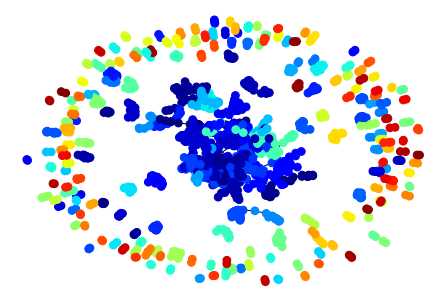

In [15]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [11]:
# num_nodes = 0
# for community in c:
#     num_nodes += len(community)
# print(num_nodes)

In [16]:
len(partition)

2068

In [17]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

2068


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,G_01_038,0
4,J_03_046,0


In [18]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

2068
(13556, 6)
(13556, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [19]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
#print(df_merged.columns.values)
df_merged.head(20)

(2723, 193)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,HandshapeImage - 100x100,HandshapeImage: URL,Parameter.Neighborhood.Density.2.0.1,SignBankSemanticField,HandshapeImage,group_id
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,1_DOLLAR,1268.0,NaN,NaN,NaN,NaN,383,None,"<img width=""100"" height=""100"" src=""https://asl...",NaN
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,5_DOLLAR,2436.0,NaN,NaN,NaN,NaN,190,Number,"<img width=""100"" height=""100"" src=""https://asl...",0.0
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,NUMBER-HOURS,2437.0,NaN,NaN,NaN,NaN,129,Number,"<img width=""100"" height=""100"" src=""https://asl...",NaN
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,OCLOCK-NUMBER,2857.0,NaN,NaN,NaN,NaN,48,None,"<img width=""100"" height=""100"" src=""https://asl...",4.0
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,"<img width=""100"" height=""100"" src=""https://asl...",92.0
5,a_little_bit,a_little_bit,H_03_025,H,3.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346887448,NaN,...,A-LITTLE-BIT,0.0,NaN,NaN,NaN,NaN,144,Attribute,"<img width=""100"" height=""100"" src=""https://asl...",39.0
6,abbreviate,abbreviate,G_01_040,G,1.0,40.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346610443,0.301,...,SHORT,252.0,NaN,NaN,NaN,NaN,368,Attribute,"<img width=""100"" height=""100"" src=""https://asl...",8.0
7,about_1,about,B_02_072,B,2.0,72.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555837,5.268,...,ABOUT,2043.0,NaN,NaN,NaN,NaN,129,Locative,"<img width=""100"" height=""100"" src=""https://asl...",110.0
8,about_2,about,B_02_003,B,2.0,3.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345536316,5.268,...,ABOUT,2042.0,61.0,35.0,NaN,NaN,129,Locative,"<img width=""100"" height=""100"" src=""https://asl...",NaN
9,absolutely_nothing,absolutely_nothing,J_01_027,J,1.0,27.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346914407,NaN,...,ABSOLUTELY-NOTHING,2044.0,NaN,NaN,NaN,NaN,232,Attribute,"<img width=""100"" height=""100"" src=""https://asl...",185.0


In [20]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0       1000.0
1          0.0
2       1000.0
3          4.0
4         92.0
         ...  
2718      16.0
2719    1000.0
2720      10.0
2721    1000.0
2722    1000.0
Name: group_id, Length: 2723, dtype: float64


array([1000.,    0.,    4.,   92.,   39.,    8.,  110.,  185.,    9.,
        216.,    5.,  108.,   43.,   79.,  117.,   11.,    2.,   41.,
         95.,   78.,   16.,  109.,   10.,   63.,  119.,   26.,  172.,
         87.,   27.,   13.,   45.,  135.,   57.,   69.,  203.,   22.,
          1.,  161.,   31.,   90.,  131.,   83.,  163.,   35.,  213.,
         66.,   38.,  173.,  155.,   98.,   52.,   29.,  124.,   46.,
         89.,  212.,  200.,   50.,  137.,   76.,   23.,  151.,   30.,
         91.,  167.,  114.,  126.,  206.,   65.,   20.,  100.,  195.,
         36.,  218.,   40.,   85.,   18.,   15.,   34.,  148.,   19.,
         80.,   68.,   64.,  115.,   25.,   96.,   94.,    3.,    7.,
         93.,  147.,  176.,  113.,  171.,  128.,   21.,  106.,  145.,
         17.,  105.,   48.,  129.,  133.,  107.,  157.,  144.,  156.,
         44.,   12.,  193.,   67.,   62.,  136.,   42.,  130.,  112.,
        143.,  205.,  210.,  215.,   73.,   32.,  189.,  190.,   51.,
        101.,  127.,

In [21]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 1000, 'color_code': '#11bf38'},
 {'group_id': 0.0, 'color_code': '#c3e136'},
 {'group_id': 4.0, 'color_code': '#9c973c'},
 {'group_id': 92.0, 'color_code': '#931d2e'},
 {'group_id': 39.0, 'color_code': '#4d8cf9'},
 {'group_id': 8.0, 'color_code': '#3140e1'},
 {'group_id': 110.0, 'color_code': '#581524'},
 {'group_id': 185.0, 'color_code': '#ae2cc4'},
 {'group_id': 9.0, 'color_code': '#068dc5'},
 {'group_id': 216.0, 'color_code': '#e3e686'},
 {'group_id': 5.0, 'color_code': '#730f62'},
 {'group_id': 108.0, 'color_code': '#268db6'},
 {'group_id': 43.0, 'color_code': '#98c7cd'},
 {'group_id': 79.0, 'color_code': '#3a0c6a'},
 {'group_id': 117.0, 'color_code': '#b48841'},
 {'group_id': 11.0, 'color_code': '#a6c0b9'},
 {'group_id': 2.0, 'color_code': '#84797e'},
 {'group_id': 41.0, 'color_code': '#9e8b75'},
 {'group_id': 95.0, 'color_code': '#2ad5c7'},
 {'group_id': 78.0, 'color_code': '#0818c2'},
 {'group_id': 16.0, 'color_code': '#a9818b'},
 {'group_id': 109.0, 'color_code': 

In [22]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#11bf38">Sample</span>.

<br><span style="color:#c3e136">Sample</span>.

<br><span style="color:#9c973c">Sample</span>.

<br><span style="color:#931d2e">Sample</span>.

<br><span style="color:#4d8cf9">Sample</span>.

<br><span style="color:#3140e1">Sample</span>.

<br><span style="color:#581524">Sample</span>.

<br><span style="color:#ae2cc4">Sample</span>.

<br><span style="color:#068dc5">Sample</span>.

<br><span style="color:#e3e686">Sample</span>.

<br><span style="color:#730f62">Sample</span>.

<br><span style="color:#268db6">Sample</span>.

<br><span style="color:#98c7cd">Sample</span>.

<br><span style="color:#3a0c6a">Sample</span>.

<br><span style="color:#b48841">Sample</span>.

<br><span style="color:#a6c0b9">Sample</span>.

<br><span style="color:#84797e">Sample</span>.

<br><span style="color:#9e8b75">Sample</span>.

<br><span style="color:#2ad5c7">Sample</span>.

<br><span style="color:#0818c2">Sample</span>.

<br><span style="color:#a9818b">Sample</span>.

<br><span style="color:#e7e9b5">Sample</span>.

<br><span style="color:#e6209a">Sample</span>.

<br><span style="color:#7fadd7">Sample</span>.

<br><span style="color:#cfcb09">Sample</span>.

<br><span style="color:#2a8e7b">Sample</span>.

<br><span style="color:#56c2e5">Sample</span>.

<br><span style="color:#50f3b8">Sample</span>.

<br><span style="color:#3d39c6">Sample</span>.

<br><span style="color:#4e2ba4">Sample</span>.

<br><span style="color:#0f2031">Sample</span>.

<br><span style="color:#92d877">Sample</span>.

<br><span style="color:#0bf932">Sample</span>.

<br><span style="color:#c7b611">Sample</span>.

<br><span style="color:#4a7a10">Sample</span>.

<br><span style="color:#c4b0a9">Sample</span>.

<br><span style="color:#91219c">Sample</span>.

<br><span style="color:#f48a27">Sample</span>.

<br><span style="color:#8b4e3b">Sample</span>.

<br><span style="color:#c98608">Sample</span>.

<br><span style="color:#7857e0">Sample</span>.

<br><span style="color:#2fb154">Sample</span>.

<br><span style="color:#75ad58">Sample</span>.

<br><span style="color:#271246">Sample</span>.

<br><span style="color:#731070">Sample</span>.

<br><span style="color:#c8cc64">Sample</span>.

<br><span style="color:#5e71ae">Sample</span>.

<br><span style="color:#a6d454">Sample</span>.

<br><span style="color:#dc7655">Sample</span>.

<br><span style="color:#4a26ff">Sample</span>.

<br><span style="color:#c1544d">Sample</span>.

<br><span style="color:#5da926">Sample</span>.

<br><span style="color:#d2b3a8">Sample</span>.

<br><span style="color:#387530">Sample</span>.

<br><span style="color:#9c3bb4">Sample</span>.

<br><span style="color:#060d77">Sample</span>.

<br><span style="color:#f0930d">Sample</span>.

<br><span style="color:#b29463">Sample</span>.

<br><span style="color:#ca2297">Sample</span>.

<br><span style="color:#7a0820">Sample</span>.

<br><span style="color:#06f03e">Sample</span>.

<br><span style="color:#8f53cc">Sample</span>.

<br><span style="color:#64c54d">Sample</span>.

<br><span style="color:#fbe2b7">Sample</span>.

<br><span style="color:#b4bd58">Sample</span>.

<br><span style="color:#964327">Sample</span>.

<br><span style="color:#df51ef">Sample</span>.

<br><span style="color:#d11892">Sample</span>.

<br><span style="color:#1b4d07">Sample</span>.

<br><span style="color:#cb5cb5">Sample</span>.

<br><span style="color:#4b0913">Sample</span>.

<br><span style="color:#683a2e">Sample</span>.

<br><span style="color:#ba53dc">Sample</span>.

<br><span style="color:#3bf58c">Sample</span>.

<br><span style="color:#4e8cbc">Sample</span>.

<br><span style="color:#8ac7c3">Sample</span>.

<br><span style="color:#085dd4">Sample</span>.

<br><span style="color:#b02c47">Sample</span>.

<br><span style="color:#577990">Sample</span>.

<br><span style="color:#cffc51">Sample</span>.

<br><span style="color:#3c6c30">Sample</span>.

<br><span style="color:#1fa81a">Sample</span>.

<br><span style="color:#5385d7">Sample</span>.

<br><span style="color:#6dd74a">Sample</span>.

<br><span style="color:#62f6ef">Sample</span>.

<br><span style="color:#48767c">Sample</span>.

<br><span style="color:#1ac0d6">Sample</span>.

<br><span style="color:#7c888d">Sample</span>.

<br><span style="color:#64b022">Sample</span>.

<br><span style="color:#fafcd1">Sample</span>.

<br><span style="color:#18ea3c">Sample</span>.

<br><span style="color:#f8660a">Sample</span>.

<br><span style="color:#af4340">Sample</span>.

<br><span style="color:#4c5330">Sample</span>.

<br><span style="color:#7b37fb">Sample</span>.

<br><span style="color:#db53ea">Sample</span>.

<br><span style="color:#64ef7c">Sample</span>.

<br><span style="color:#77281c">Sample</span>.

<br><span style="color:#d89e4a">Sample</span>.

<br><span style="color:#7eae42">Sample</span>.

<br><span style="color:#4bdb3a">Sample</span>.

<br><span style="color:#f42e3e">Sample</span>.

<br><span style="color:#dafd5a">Sample</span>.

<br><span style="color:#753eba">Sample</span>.

<br><span style="color:#571949">Sample</span>.

<br><span style="color:#d2f7ef">Sample</span>.

<br><span style="color:#f79dd8">Sample</span>.

<br><span style="color:#6350e6">Sample</span>.

<br><span style="color:#5e4f68">Sample</span>.

<br><span style="color:#2a7859">Sample</span>.

<br><span style="color:#7d9363">Sample</span>.

<br><span style="color:#bb5a79">Sample</span>.

<br><span style="color:#8370ed">Sample</span>.

<br><span style="color:#2a513d">Sample</span>.

<br><span style="color:#ce2d19">Sample</span>.

<br><span style="color:#21c5cd">Sample</span>.

<br><span style="color:#37b871">Sample</span>.

<br><span style="color:#91b19f">Sample</span>.

<br><span style="color:#b03acb">Sample</span>.

<br><span style="color:#756653">Sample</span>.

<br><span style="color:#d9efc3">Sample</span>.

<br><span style="color:#bcb263">Sample</span>.

<br><span style="color:#d2de05">Sample</span>.

<br><span style="color:#326c86">Sample</span>.

<br><span style="color:#08d9be">Sample</span>.

<br><span style="color:#8ce263">Sample</span>.

<br><span style="color:#00d4ab">Sample</span>.

<br><span style="color:#a4be93">Sample</span>.

<br><span style="color:#9b8ddf">Sample</span>.

<br><span style="color:#66de6a">Sample</span>.

<br><span style="color:#976a0a">Sample</span>.

<br><span style="color:#b841c2">Sample</span>.

<br><span style="color:#601965">Sample</span>.

<br><span style="color:#8c9052">Sample</span>.

<br><span style="color:#79ed8b">Sample</span>.

<br><span style="color:#df8e72">Sample</span>.

<br><span style="color:#191240">Sample</span>.

<br><span style="color:#84f38b">Sample</span>.

<br><span style="color:#24df8c">Sample</span>.

<br><span style="color:#f2ad3e">Sample</span>.

<br><span style="color:#b742cd">Sample</span>.

<br><span style="color:#c74b52">Sample</span>.

<br><span style="color:#41161d">Sample</span>.

<br><span style="color:#09803d">Sample</span>.

<br><span style="color:#e20465">Sample</span>.

<br><span style="color:#9342b5">Sample</span>.

<br><span style="color:#b238f8">Sample</span>.

<br><span style="color:#0525e1">Sample</span>.

<br><span style="color:#ecf813">Sample</span>.

<br><span style="color:#3e0f6b">Sample</span>.

<br><span style="color:#e89125">Sample</span>.

<br><span style="color:#e0fb9a">Sample</span>.

<br><span style="color:#0c7000">Sample</span>.

<br><span style="color:#c8a57a">Sample</span>.

<br><span style="color:#2d8f94">Sample</span>.

<br><span style="color:#341a1d">Sample</span>.

<br><span style="color:#9774ca">Sample</span>.

<br><span style="color:#3e9aa8">Sample</span>.

<br><span style="color:#9da16d">Sample</span>.

<br><span style="color:#879e5c">Sample</span>.

<br><span style="color:#6bebc0">Sample</span>.

<br><span style="color:#8f5f81">Sample</span>.

<br><span style="color:#d40e4a">Sample</span>.

<br><span style="color:#b320d9">Sample</span>.

<br><span style="color:#2e7fa8">Sample</span>.

<br><span style="color:#b0356f">Sample</span>.

<br><span style="color:#b91a82">Sample</span>.

<br><span style="color:#1180d7">Sample</span>.

<br><span style="color:#8f9326">Sample</span>.

<br><span style="color:#a68f2e">Sample</span>.

<br><span style="color:#a5f81f">Sample</span>.

<br><span style="color:#33cce7">Sample</span>.

<br><span style="color:#63187d">Sample</span>.

<br><span style="color:#08cca7">Sample</span>.

<br><span style="color:#d4556d">Sample</span>.

<br><span style="color:#4dd9fe">Sample</span>.

<br><span style="color:#28cf05">Sample</span>.

<br><span style="color:#49a83d">Sample</span>.

<br><span style="color:#24a196">Sample</span>.

<br><span style="color:#e6b4c5">Sample</span>.

<br><span style="color:#b2262f">Sample</span>.

<br><span style="color:#a08a59">Sample</span>.

<br><span style="color:#645e5b">Sample</span>.

<br><span style="color:#ac4e33">Sample</span>.

<br><span style="color:#5c19fd">Sample</span>.

<br><span style="color:#16df4c">Sample</span>.

<br><span style="color:#e61158">Sample</span>.

<br><span style="color:#603b84">Sample</span>.

<br><span style="color:#5973e7">Sample</span>.

<br><span style="color:#a54c23">Sample</span>.

<br><span style="color:#20f3e7">Sample</span>.

<br><span style="color:#613536">Sample</span>.

<br><span style="color:#aa674f">Sample</span>.

<br><span style="color:#0556de">Sample</span>.

<br><span style="color:#8cbfe7">Sample</span>.

<br><span style="color:#d72d6b">Sample</span>.

<br><span style="color:#f6e744">Sample</span>.

<br><span style="color:#c4572b">Sample</span>.

<br><span style="color:#547e0f">Sample</span>.

<br><span style="color:#e9f19e">Sample</span>.

<br><span style="color:#897551">Sample</span>.

<br><span style="color:#e1a070">Sample</span>.

<br><span style="color:#6be01d">Sample</span>.

<br><span style="color:#16bfe6">Sample</span>.

<br><span style="color:#e49ba0">Sample</span>.

<br><span style="color:#5fcf71">Sample</span>.

<br><span style="color:#3ba246">Sample</span>.

<br><span style="color:#8f5080">Sample</span>.

<br><span style="color:#27ba9d">Sample</span>.

<br><span style="color:#59a689">Sample</span>.

<br><span style="color:#0ad45d">Sample</span>.

<br><span style="color:#4964bf">Sample</span>.

<br><span style="color:#e2bf67">Sample</span>.

<br><span style="color:#7aa124">Sample</span>.

<br><span style="color:#9cad40">Sample</span>.

<br><span style="color:#85a19b">Sample</span>.

<br><span style="color:#94ce90">Sample</span>.

<br><span style="color:#eb0e22">Sample</span>.

<br><span style="color:#d3440b">Sample</span>.

<br><span style="color:#4477a7">Sample</span>.

<br><span style="color:#ed0f47">Sample</span>.

In [23]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 194)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,SignBankReferenceID,bglm_aoa,empirical_aoa,HandshapeImage - 100x100,HandshapeImage: URL,Parameter.Neighborhood.Density.2.0.1,SignBankSemanticField,HandshapeImage,group_id,color_code
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,1268.0,NaN,NaN,NaN,NaN,383,None,"<img width=""100"" height=""100"" src=""https://asl...",1000.0,#11bf38
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,2436.0,NaN,NaN,NaN,NaN,190,Number,"<img width=""100"" height=""100"" src=""https://asl...",0.0,#c3e136
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,2437.0,NaN,NaN,NaN,NaN,129,Number,"<img width=""100"" height=""100"" src=""https://asl...",1000.0,#11bf38
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,2857.0,NaN,NaN,NaN,NaN,48,None,"<img width=""100"" height=""100"" src=""https://asl...",4.0,#9c973c
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,NaN,NaN,NaN,NaN,NaN,158,NaN,"<img width=""100"" height=""100"" src=""https://asl...",92.0,#931d2e


In [24]:
df_merged_with_color.shape

(2723, 194)

In [25]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,1_dollar,C_02_025,1000.0,#11bf38,-0.728
1,5_dollars,B_01_062,0.0,#c3e136,0.302
2,8_hour,C_02_055,1000.0,#11bf38,-0.025
3,9_oclock,C_02_080,4.0,#9c973c,-0.122
4,a-line_bob,K_03_127,92.0,#931d2e,0.030
5,a_little_bit,H_03_025,39.0,#4d8cf9,-0.762
6,abbreviate,G_01_040,8.0,#3140e1,0.669
7,about_1,B_02_072,110.0,#581524,0.523
8,about_2,B_02_003,1000.0,#11bf38,-0.762
9,absolutely_nothing,J_01_027,185.0,#ae2cc4,-0.686


In [26]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [27]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,G_01_038
3,A_01_002,J_03_046
4,A_01_003,D_02_047


In [28]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [29]:
# cols_not_in_sign_pane = ["LemmaID", "SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [30]:
#Remove cols in sign pane
#Keep column for filters and vimeo video
cols_in_sign_data_pane = ["EntryID","LemmaID","Code","Batch","List","Item","YouTube Video","VimeoVideoHTML","VimeoVideo","SubtLexUSLog10WF","SignFrequency(M)","SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFrequency(N-Nonnative)","SignFreq(Z-Nonnative)","GuessAccuracy","DominantTranslation","PercentUnknown","PercentGlossAgreement","PercentUnknown(Native)","PercentGlossAgreement(Native)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(M)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","IconicityType","D.Iconicity(M) all","D.Iconicity(SD) all","D.Iconicity(N) all","D.Iconicity(Z) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","H statistic","Transparency(M)","Transparency SD","Transparency Z","LexicalClass","SignOnset(ms)","SignOffset(ms)","SignDuration(ms)","ClipDuration(ms)","InCDI","CDI Semantic Category","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","Spread.2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","Phonological Complexity","PhonotacticProbability","Parameter.Neighborhood.Density.2.0","Neighborhood Density 2.0","SignBankAnnotationID","SignBankEnglishTranslations","SignBankLemmaID","SignBankSemanticField","SignBankReferenceID","bglm_aoa","empirical_aoa", "Complexity", "HandshapeImage"]
# ["EntryID","SignFrequency(M)","PercentUnknown","PercentGlossAgreement","DominantTranslation","SubtLexUSLog10WF","Iconicity(M)","Transparency M","H index","LexicalClass","SignLength(ms)","ClipLength(ms)","Complexity","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","bglm_aoa","Neighborhood Density 2.0","Parameter.Neighborhood.Density.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","Spread.2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","PhonotacticProbability","SignBankID","SignBankLemmaID","SignBankAnnotationID","SignBankSemanticField","SignBankEnglishTranslations","D.Iconicity(M) all", "empirical_aoa"]

In [31]:
# df_merged_with_color.columns.values

In [32]:
# df_merged_with_color[["EntryID","SignFrequency(M)","PercentUnknown"]]

In [33]:
df_merged_with_color.columns.tolist()

['EntryID',
 'LemmaID',
 'Code',
 'Batch',
 'List',
 'Item',
 'YouTube Video',
 'VimeoVideoHTML',
 'VimeoVideo',
 'SubtLexUSLog10WF',
 'SignFrequency(M)',
 'SignFrequency(SD)',
 'SignFrequency(Z)',
 'SignFrequency(N)',
 'SignFrequency(M-Native)',
 'SignFrequency(SD-Native)',
 'SignFreq(Z-native)',
 'SignFrequency(N-Native)',
 'SignFrequency(M-Nonnative)',
 'SignFrequency(SD-Nonnative)',
 'SignFrequency(N-Nonnative)',
 'SignFreq(Z-Nonnative)',
 'DominantTranslation',
 'NondominantTranslation',
 'PercentUnknown',
 'PercentGlossAgreement',
 'PercentUnknown(Native)',
 'PercentGlossAgreement(Native)',
 'PercentUnknown(Nonnative)',
 'PercentGlossAgreement(Nonnative)',
 'Iconicity(M)',
 'Iconicity(SD)',
 'Iconicity(Z)',
 'Iconicity(N)',
 'Iconicity_ID',
 'IconicityType',
 'D.Iconicity(M) all',
 'D.Iconicity(SD) all',
 'D.Iconicity(N) all',
 'D.Iconicity(Z) all',
 'D.Iconicity(M) native',
 'D.Iconicity(SD) native',
 'D.Iconicity(Z) native',
 'D.Iconicity(N) native',
 'H statistic',
 'GuessAccu

In [34]:
#### Get rid of morpheme columbs
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in test_df.columns:
    if col not in cols_in_sign_data_pane:
#         if col in test_df.columns:
        print("dropping " + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

194
dropping NondominantTranslation
dropping HandshapeImage - 100x100
dropping HandshapeImage: URL
dropping Parameter.Neighborhood.Density.2.0.1
dropping group_id
dropping color_code


188

In [35]:
for col in cols_in_sign_data_pane:
    if col not in test_df.columns:
        print("This column is not present: " + col)

This column is not present: MarkedHandshape.2.0
This column is not present: MarkedHandshapeM2.2.0
This column is not present: MarkedHandshapeM3.2.0
This column is not present: MarkedHandshapeM4.2.0
This column is not present: MarkedHandshapeM5.2.0
This column is not present: MarkedHandshapeM6.2.0
This column is not present: Complexity


In [36]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['List' 'Item' 'SubtLexUSLog10WF' 'SignFrequency(M)' 'SignFrequency(SD)'
 'SignFrequency(Z)' 'SignFrequency(N)' 'SignFrequency(M-Native)'
 'SignFrequency(SD-Native)' 'SignFreq(Z-native)' 'SignFrequency(N-Native)'
 'SignFrequency(M-Nonnative)' 'SignFrequency(SD-Nonnative)'
 'SignFrequency(N-Nonnative)' 'SignFreq(Z-Nonnative)' 'PercentUnknown'
 'PercentGlossAgreement' 'PercentUnknown(Native)'
 'PercentGlossAgreement(Native)' 'PercentUnknown(Nonnative)'
 'PercentGlossAgreement(Nonnative)' 'Iconicity(M)' 'Iconicity(SD)'
 'Iconicity(Z)' 'Iconicity(N)' 'D.Iconicity(M) all' 'D.Iconicity(SD) all'
 'D.Iconicity(N) all' 'D.Iconicity(Z) all' 'D.Iconicity(M) native'
 'D.Iconicity(SD) native' 'D.Iconicity(Z) native' 'D.Iconicity(N) native'
 'H statistic' 'GuessAccuracy' 'Transparency(M)' 'Transparency SD'
 'Transparency Z' 'SignOnset(ms)' 'SignOffset(ms)' 'SignDuration(ms)'
 'ClipDuration(ms)' 'Initialized.2.0' 'FingerspelledLoanSign.2.0'
 'Compound.2.0' 'NumberOfMorphemes.2.0' 'FlexionChange.2.0' 

In [37]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
#     print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

In [38]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': '1_dollar',
 'Code': 'C_02_025',
 'group_id': 1000.0,
 'color_code': '#11bf38',
 'SignFrequency(Z)': -0.728}

In [39]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


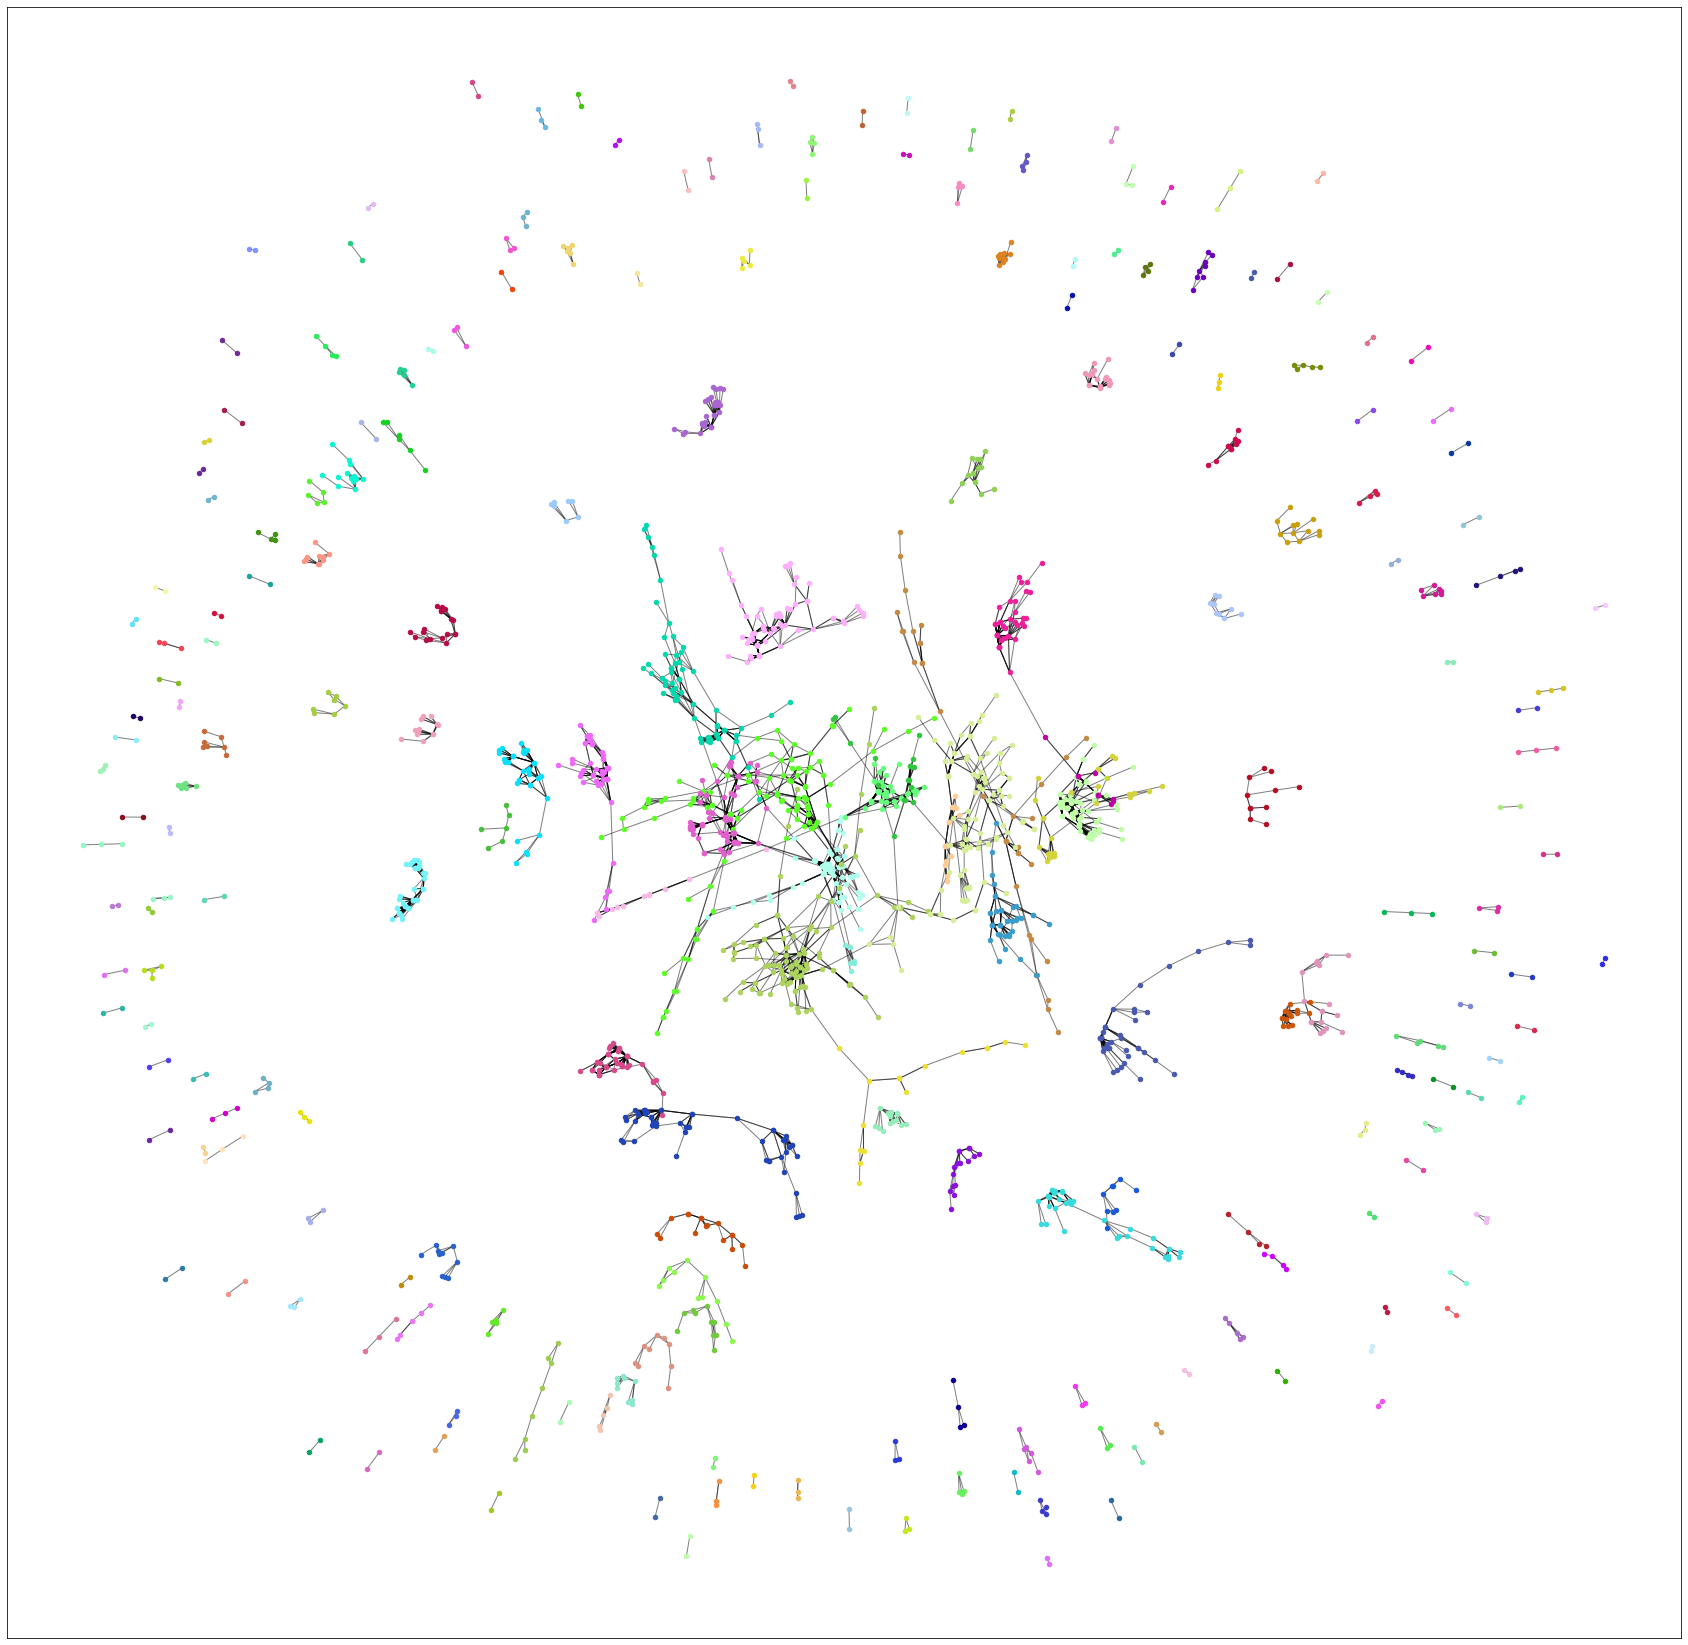

In [40]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [41]:
## Code to change color in json
color_dictionary


{'island': '#11bf38',
 '0': '#c3e136',
 '4': '#9c973c',
 '92': '#931d2e',
 '39': '#4d8cf9',
 '8': '#3140e1',
 '110': '#581524',
 '185': '#ae2cc4',
 '9': '#068dc5',
 '216': '#e3e686',
 '5': '#730f62',
 '108': '#268db6',
 '43': '#98c7cd',
 '79': '#3a0c6a',
 '117': '#b48841',
 '11': '#a6c0b9',
 '2': '#84797e',
 '41': '#9e8b75',
 '95': '#2ad5c7',
 '78': '#0818c2',
 '16': '#a9818b',
 '109': '#e7e9b5',
 '10': '#e6209a',
 '63': '#7fadd7',
 '119': '#cfcb09',
 '26': '#2a8e7b',
 '172': '#56c2e5',
 '87': '#50f3b8',
 '27': '#3d39c6',
 '13': '#4e2ba4',
 '45': '#0f2031',
 '135': '#92d877',
 '57': '#0bf932',
 '69': '#c7b611',
 '203': '#4a7a10',
 '22': '#c4b0a9',
 '1': '#91219c',
 '161': '#f48a27',
 '31': '#8b4e3b',
 '90': '#c98608',
 '131': '#7857e0',
 '83': '#2fb154',
 '163': '#75ad58',
 '35': '#271246',
 '213': '#731070',
 '66': '#c8cc64',
 '38': '#5e71ae',
 '173': '#a6d454',
 '155': '#dc7655',
 '98': '#4a26ff',
 '52': '#c1544d',
 '29': '#5da926',
 '124': '#d2b3a8',
 '46': '#387530',
 '89': '#9c3bb

In [115]:
###Only if you need to edit the graph json files

# def filter_dict(d, filter_string):
# #     print(filter_string)
#     for key, val in d.items():
#         if filter_string != key:
#             continue
#         return key, val

# with open('../../visualization/data/graph.json') as graph_json_file:
#     data = json.load(graph_json_file)
#     for node in data['nodes']:
#         if(node['group_id'] == ""):
#             node['group_id']= "island"    
# #             print(node)
    
#     for node in data['nodes']:
#         key,val = filter_dict(color_dictionary, str(node['group_id']))
#         node['color_code'] = val
#         print(node)


In [116]:
#Resave as JSON

# graph = {
#     "nodes" : data['nodes'],
#     "links": data['links']
# }

# with open("../generated-data/graph.json", 'w') as file:
#     json.dump(graph, file)

In [117]:
import pandas as pd

In [118]:
signs_latest_csv = pd.read_csv('../signdata-07-08-2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../signdata-07-08-2020.csv'

In [ ]:
signs_latest_csv['Iconicity(Z)'].max()